<a href="https://colab.research.google.com/github/kimvkemenade/DM_team16/blob/main/DM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 (Group 16)**


# Cleaning data

In [180]:
#importing the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
# downloading the dataset
#!kaggle datasets download rodsaldanha/arketing-campaign

# unzipping the dataset
#!unzip arketing-campaign.zip

df_raw = pd.read_csv('marketing_campaign.csv', sep = ';')
marketing_df = df_raw.copy()

In [182]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [183]:
print("Shape of the dataframe:", marketing_df.shape)
marketing_df.info()

Shape of the dataframe: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Num

| #  | Variable               | Description                                                                 |
|----|------------------------|-----------------------------------------------------------------------------|
| 1  | AcceptedCmp1           | 1 if customer accepted the offer in the 1st campaign, 0 otherwise           
| 2  | AcceptedCmp2           | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise           |
| 3  | AcceptedCmp3           | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise           |
| 4  | AcceptedCmp4           | 1 if customer accepted the offer in the 4th campaign, 0 otherwise           |
| 5  | AcceptedCmp5           | 1 if customer accepted the offer in the 5th campaign, 0 otherwise           |
| 6  | Response      | 1 if customer accepted the offer in the last campaign, 0 otherwise          |
| 7  | Complain               | 1 if customer complained in the last 2 years                                |
| 8  | DtCustomer             | date of customer’s enrolment with the company                               |
| 9  | Education              | customer’s level of education                                               |
| 10 | Marital                | customer’s marital status                                                   |
| 11 | Kidhome                | number of small children in customer’s household                            |
| 12 | Teenhome               | number of teenagers in customer’s household                                 |
| 13 | Income                 | customer’s yearly household income                                          |
| 14 | MntFishProducts        | amount spent on fish products in the last 2 years                           |
| 15 | MntMeatProducts        | amount spent on meat products in the last 2 years                           |
| 16 | MntFruits              | amount spent on fruits products in the last 2 years                         |
| 17 | MntSweetProducts       | amount spent on sweet products in the last 2 years                          |
| 18 | MntWines               | amount spent on wine products in the last 2 years                           |
| 19 | MntGoldProds           | amount spent on gold products in the last 2 years                           |
| 20 | NumDealsPurchases      | number of purchases made with discount                                      |
| 21 | NumCatalogPurchases    | number of purchases made using catalogue                                    |
| 22 | NumStorePurchases      | number of purchases made directly in stores                                 |
| 23 | NumWebPurchases        | number of purchases made through company’s web site                         |
| 24 | NumWebVisitsMonth      | number of visits to company’s web site in the last month                    |
| 25 | Recency                | number of days since the last purchase                                      |

## Checking the balanceness of marketing campaign variables

In [184]:
not_accepted_df = marketing_df[(marketing_df['AcceptedCmp1'] == 0) &
                 (marketing_df['AcceptedCmp2'] == 0) &
                 (marketing_df['AcceptedCmp3'] == 0) &
                 (marketing_df['AcceptedCmp4'] == 0) &
                 (marketing_df['AcceptedCmp5'] == 0) &
                 (marketing_df['Response'] == 0)]

# Display the filtered DataFrame
not_accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0


In [165]:
columns_to_check = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
accepted_df = marketing_df[(marketing_df[columns_to_check] != 0).any(axis=1)]

# Display the filtered DataFrame
accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,...,0,0,1,0,0,0,0,3,11,0
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0


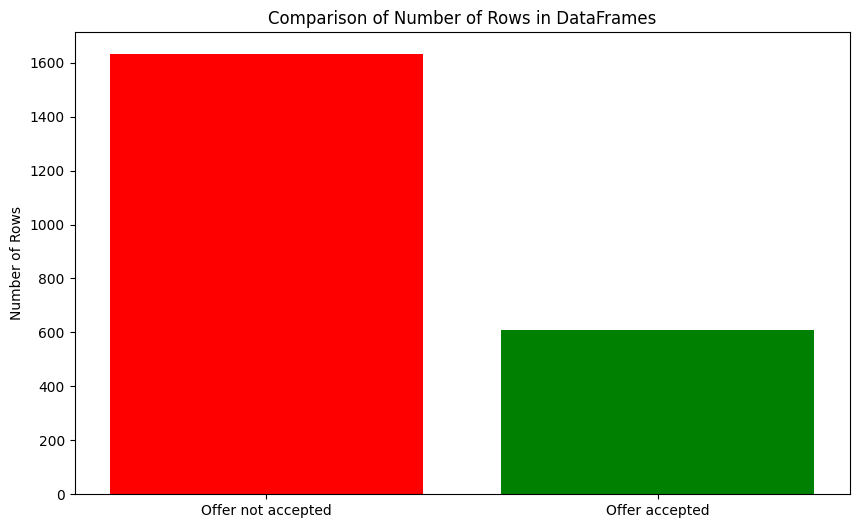

In [166]:
num_rows_filtered_df = len(not_accepted_df)
num_rows_filtered_non_zero_df = len(accepted_df)

# Data for plotting
data = {
    'DataFrame': ['Offer not accepted', 'Offer accepted'],
    'Number of Rows': [num_rows_filtered_df, num_rows_filtered_non_zero_df]
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(plot_df['DataFrame'], plot_df['Number of Rows'], color=['red', 'green'])
plt.ylabel('Number of Rows')
plt.title('Comparison of Number of Rows in DataFrames')
plt.show()

As can be seen in the graph above, not many consumers have accepted any offers. Additionally, since our purpose is to predict whether marketing campaings work in general and also because there is no description what each individual marketing campaign is, we are creating a new variable `AcceptedCmp` that is 1 if a customer accepted any of the six campaigns (including `Response`) and 0 if a customer did not accept any.

In [185]:
#some cleaning
#getting rid of Z_CostContact and Z_Revenue constant variables
marketing_df = marketing_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

#creating AcceptedCmp variable
marketing_df['AcceptedCmp'] = marketing_df[['AcceptedCmp1', 'AcceptedCmp2',
                                            'AcceptedCmp3',
                                            'AcceptedCmp4', 'AcceptedCmp5',
                                            'Response']].max(axis=1)

#dropping unuseful variables
marketing_df = marketing_df.drop(['AcceptedCmp1', 'AcceptedCmp2',
                                  'AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'Response'], axis=1)

marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,0,0


## Missing values

In [186]:
# Number of missing values
print(marketing_df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
AcceptedCmp             0
dtype: int64


Since only 24 rows have missing values, we are dropping them, believing it will not affect the data:

In [187]:
# Dropping NAs
marketing_df = marketing_df.dropna()

In [188]:
# Checking whether there are duplicated values
marketing_df.duplicated().sum()

0

## Outliers

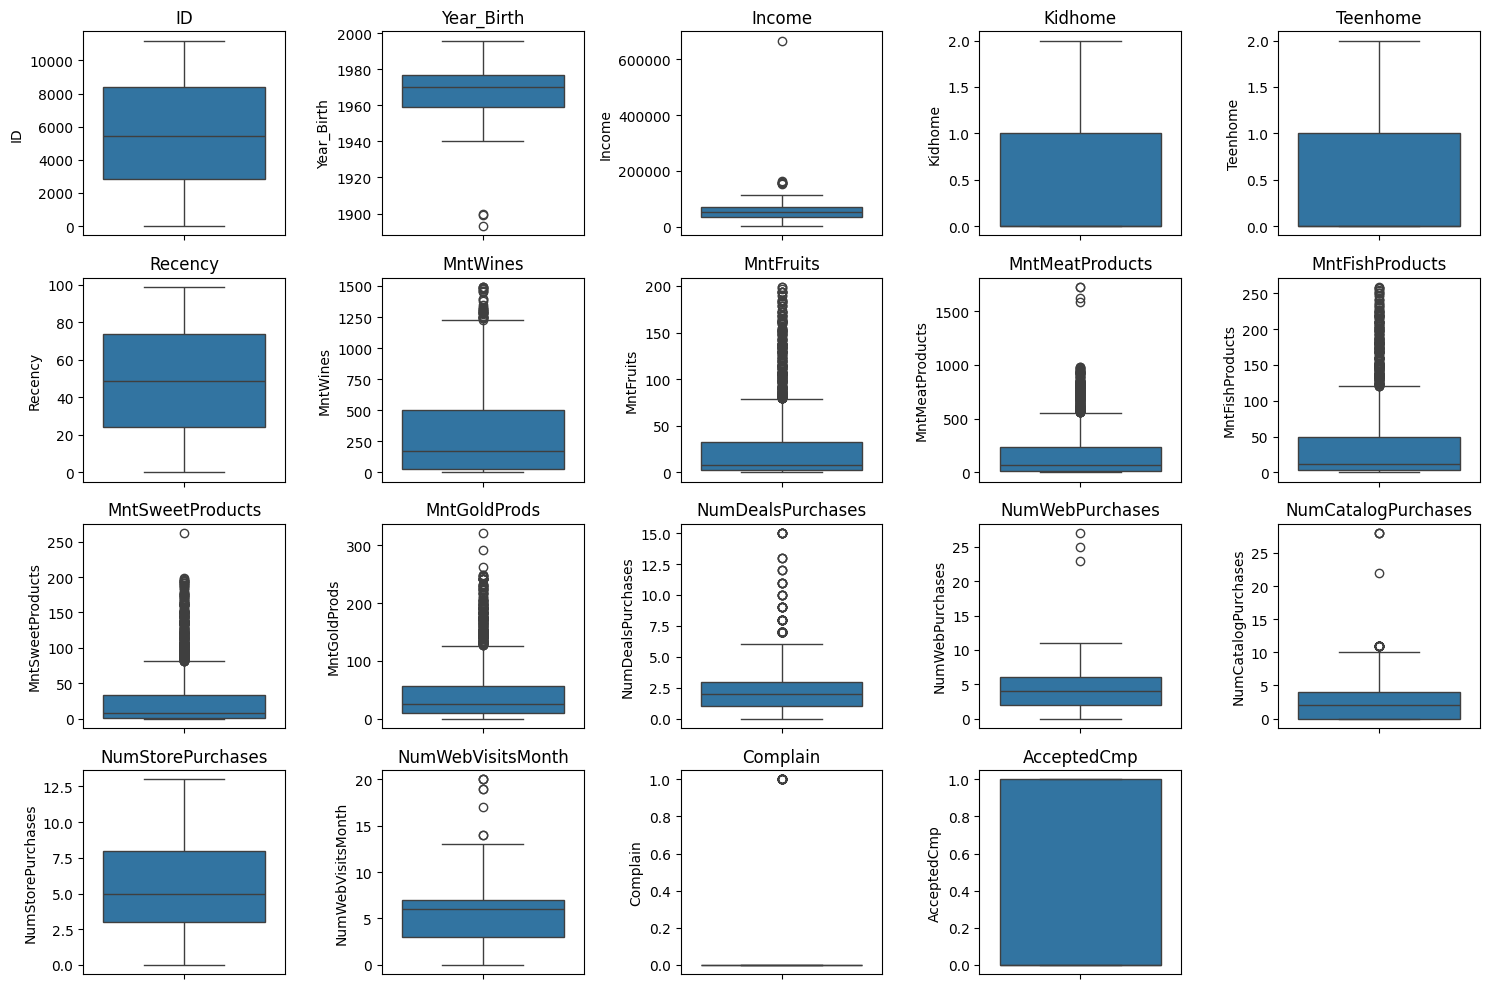

In [189]:
# selecting only numeric variables to check for the ouliers
numerical_columns = marketing_df.select_dtypes(include = ['float64', 'int64']).columns

# create a figure with barplot subplots
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//5 + 1, 5, i)
    sns.boxplot(y = marketing_df[feature], showfliers = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

It seems like variables `Income`, `NumWebPurchases`, `NumCatalogPurchases` have some outliers.

To further investigate:

There is a significant bias in the data, if we want to predict this we need to deal with this unbalancedness. Additionally, since we are gonna use models that use distance metrics, we need to standardize our features. The codes for these tasks are located in the **Models** section.

In [190]:
# changing date of birth to 'Age'
def change_date():
  """
  Changes 'Year_Birth' variable into categorical 'Age' variable.
  """
  age = []
  for i in marketing_df['Year_Birth']:
      if i <= 1959:
          age.append('Elderly')
      elif i > 1959 and i <=1977:
          age.append('MiddleAge')
      else:
          age.append('Young')
  marketing_df['Age'] = age
  return marketing_df

change_date()
marketing_df.drop(['Year_Birth', 'ID'], axis=1, inplace=True)

# age allocations
marketing_df['Age'].value_counts()

MiddleAge    1106
Elderly       562
Young         548
Name: Age, dtype: int64

# EDA

* **include some graphs**
* **association rule analysis**

In [173]:
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.009477,0.273014
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.096907,0.445609
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


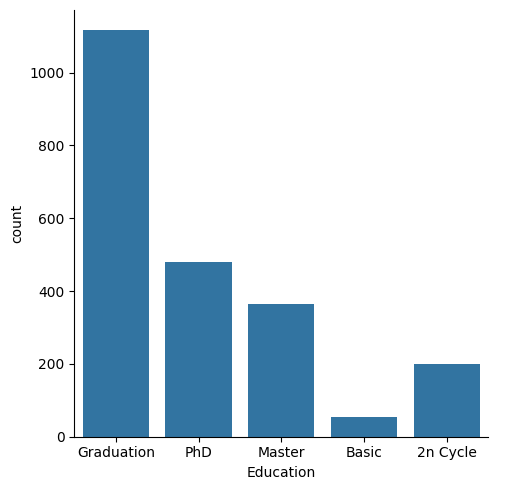

In [174]:
sns.catplot(data=marketing_df, x="Education", kind="count")

In [196]:
#replacing '2n Cycle' with 'Master'
marketing_df['Education'] = marketing_df['Education'].replace({'2n Cycle': 'Master'})
# looking at the new distribution
marketing_df['Education'].value_counts() # actual count/values
marketing_df['Education'].value_counts()

C:\Users\daran\AppData\Local\Temp\ipykernel_45360\991473678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df['Education'] = marketing_df['Education'].replace({'2n Cycle': 'Master'})


Graduation    1115
Master         564
PhD            479
Basic           54
Name: Education, dtype: int64

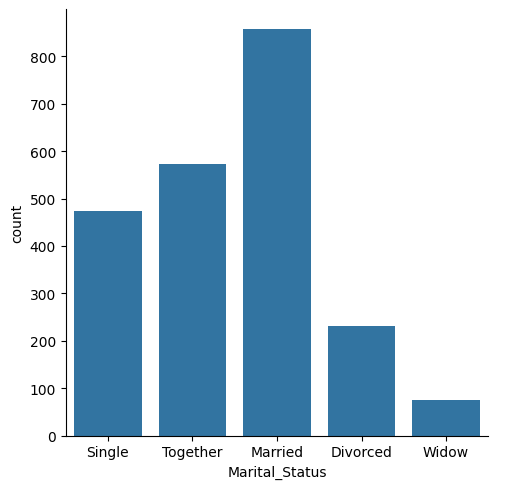

In [197]:
sns.catplot(data=marketing_df, x="Marital_Status", kind="count",)

In [198]:
# counting marital statuses
marketing_df['Marital_Status'].value_counts()

Married     857
Together    573
Single      474
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

Above, we can see that there are some interesting `Marital_Status` categories, such as *Alone*, *Absurd*, and *YOLO*. We have decided to add *Alone* customers to the Singles, and get rid of the *Absurd* and *YOLO* ones.

In [199]:
#replacing 'Alone' with 'Single'
marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace({'Alone': 'Single'})

#remowing rows where Marital_Status is 'Absurd' or 'YOLO'
marketing_df = marketing_df[~marketing_df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# counting marital statuses
marketing_df['Marital_Status'].value_counts()

C:\Users\daran\AppData\Local\Temp\ipykernel_45360\2467208322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace({'Alone': 'Single'})


Married     857
Together    573
Single      474
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

## Clustering
### K Means

This is a distance-based algorithm so prior to training it it is crucial to standardized the variables so they have equal weight to the model.

Since StandardScalar() only works with numeric data, we first need to handle our non-numeric features (Education, Marital_Status, Dt_Customer)

Since Marital_status and Education are categorical one hot encoding will be implemented. Additional insights need to be gained about Dt_customer to decide how to treat it.



Counting the number of cells for Dt_customer (along with other variables), to consider the possibility of doing one hot encoding:

In [195]:
# counting number of unique cells for Dt_customer
print(marketing_df["Dt_Customer"].nunique())

# counting number of unique cells for ID
#marketing_df["ID"].nunique()

[(column_name, marketing_df[column_name].nunique()) for column_name in list(marketing_df.columns)]

662


[('Education', 4),
 ('Marital_Status', 5),
 ('Income', 1973),
 ('Kidhome', 3),
 ('Teenhome', 3),
 ('Dt_Customer', 662),
 ('Recency', 100),
 ('MntWines', 776),
 ('MntFruits', 158),
 ('MntMeatProducts', 554),
 ('MntFishProducts', 182),
 ('MntSweetProducts', 176),
 ('MntGoldProds', 211),
 ('NumDealsPurchases', 15),
 ('NumWebPurchases', 15),
 ('NumCatalogPurchases', 14),
 ('NumStorePurchases', 14),
 ('NumWebVisitsMonth', 16),
 ('Complain', 2),
 ('AcceptedCmp', 2),
 ('Age', 3)]

ID is also removed because this column is only used to identify customers, it does not contain meaningful patterns that would help in clustering. Specially when considering that all observations of this variable are unique. Columns Z_CostContact and Z_revenue are also removed for the opposite, all the values are the same, thus not adding any additional insights to the data.

Dt_Customer on the other hand, has 662 different cells which would mean adding 663 additional columns to our dataset if we were to treat date as a dummy. This in practice makes no sense since it is not a categorical variable and would increase dimesnsionality by a lot. Thus, this varaible is dropped before performing clustering

In [211]:

# removing outliers (Kmeans very sensible to outliers)
# creating a function to speed up the process
def remove_outliers_iqr(df, selected_columns):
    Q1 = df[selected_columns].quantile(0.25)
    Q3 = df[selected_columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Create a mask for rows where any column has an outlier
    outlier_mask = ~((df[selected_columns] < (Q1 - 1.5 * IQR)) | 
                     (df[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Print summary of removed rows
    print(f"Original dataset size: {len(df)}")
    print(f"Number of rows removed: {len(df) - sum(outlier_mask)}")
    print(f"New dataset size: {sum(outlier_mask)}")
    
    return df[outlier_mask]
# using function and selecting columns I want to remove outliers from (based on boxplots results)
df_no_outliers = remove_outliers_iqr(marketing_df, ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                                                'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']) 

# performing one-hot scaling on categroical variables so you can
df_encoded = pd.get_dummies(df_no_outliers, columns= ["Education", "Marital_Status", 'Age'], dtype='int') # making output an int instead of boolean

# dropping Dt_Customer as this variable is non_numeric and one-hot-encoding would result in 663 additional columns
df_encoded = df_encoded.drop(["Dt_Customer"], axis = 1)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # standardizing data
marketing_normalized = scaler.fit_transform(df_encoded)

#turning output into a dataframe
marketing_df_normalized = pd.DataFrame(marketing_normalized, index=df_encoded.index, columns=df_encoded.columns)



Original dataset size: 2212
Number of rows removed: 706
New dataset size: 1506


In [212]:
from sklearn.decomposition import PCA
pca = PCA(0.95)  # 0.95 represents 95% of variance
reduced_data = pca.fit_transform(marketing_df_normalized)

# print number of componenets 
print(f"Number of components selected to explain 95% variance: {pca.n_components_}")

Number of components selected to explain 95% variance: 20


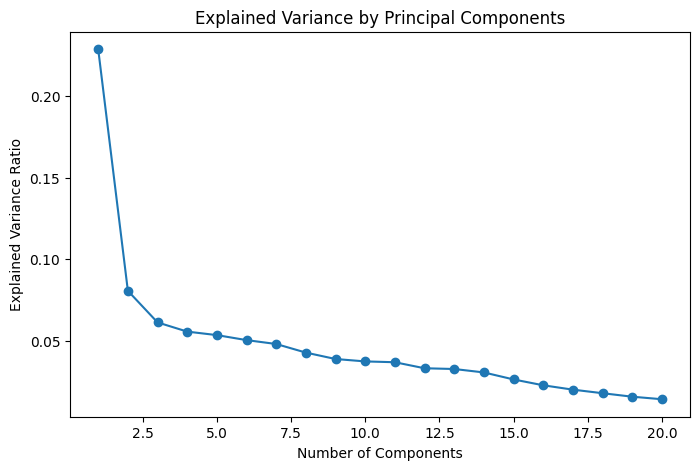

In [213]:
# visualization to help us determine the optimal number of clusters 
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.show()


As we can see from the illustration above the optimal number of principal components is 2, as from this point onwards variance decreases but at a way smaller rate. With this information we will reduce the dimensionality of our data.

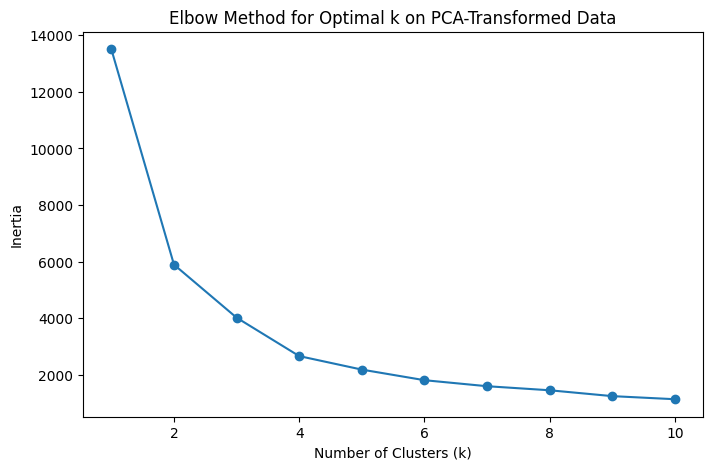

In [214]:
# applying PCA with 2 components
pca_2 = PCA(n_components=2)
pca_data = pca_2.fit_transform(marketing_df_normalized)

# running several kmeans algorithms 
inertia = []  # List to hold sum of squared errors for each k
k_values = range(1, 11)  # Test values of k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)  # Inertia: sum of squared distances to nearest cluster center

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k on PCA-Transformed Data")
plt.show()

In [215]:
marketing_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 1 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   1506 non-null   float64
 1   Kidhome                  1506 non-null   float64
 2   Teenhome                 1506 non-null   float64
 3   Recency                  1506 non-null   float64
 4   MntWines                 1506 non-null   float64
 5   MntFruits                1506 non-null   float64
 6   MntMeatProducts          1506 non-null   float64
 7   MntFishProducts          1506 non-null   float64
 8   MntSweetProducts         1506 non-null   float64
 9   MntGoldProds             1506 non-null   float64
 10  NumDealsPurchases        1506 non-null   float64
 11  NumWebPurchases          1506 non-null   float64
 12  NumCatalogPurchases      1506 non-null   float64
 13  NumStorePurchases        1506 non-null   float64
 14  NumWebVisitsMonth       

In [206]:
[marketing_df[column].value_counts() for column in marketing_df[["Kidhome", "Teenhome", 'NumWebVisitsMonth']]]


[0    1279
 1     887
 2      46
 Name: Kidhome, dtype: int64,
 0    1145
 1    1016
 2      51
 Name: Teenhome, dtype: int64,
 7     387
 8     338
 6     335
 5     279
 4     217
 3     203
 2     200
 1     149
 9      82
 0      10
 20      3
 10      3
 14      2
 19      2
 17      1
 13      1
 Name: NumWebVisitsMonth, dtype: int64]

Now that the data has been standadrized we can move on with applying the K means algorithm. To use this model, you need to predetermine the number of clusters (K), so multiples K will be considered at the beginning to compare them and select the optimal number.

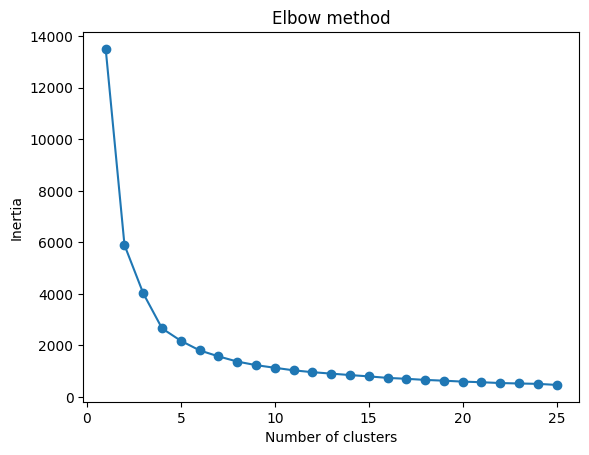

In [216]:
from sklearn.cluster import KMeans
# performing K-means clustering for each number of clusters (1-12 clusters)
inertias = [] # empty list where inertia scores will go 
labels_kmeans = [] # this list is used later to compute silhoutte scores
# we calculate this now so we do not have to use another for loop to run the same models 

for i in range(1,26):
    kmeans = KMeans(n_clusters=i,  init='random', random_state= 42)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_) # adding inertia to the list
    labels_kmeans.append(kmeans.labels_)


plt.plot(range(1,26), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on this illustration and the elbow method, we would argue that the optimal K value is around 10 as from this point onwards inertia starts diminishing at a lower rate (this is more evident by looking at the list below, were the first number of each tuple represents the value of k and the second the inertis). Thus, 10 clusters were selected

In [217]:
[(k, inertia) for k, inertia in zip(range(1,101), inertias)] # 79775

[(1, 13507.147564832367),
 (2, 5895.532421702084),
 (3, 4020.907409367792),
 (4, 2662.5043276359097),
 (5, 2182.354373357493),
 (6, 1810.1328925306163),
 (7, 1578.2670773900245),
 (8, 1376.9157617166275),
 (9, 1237.4861795970342),
 (10, 1135.5441323353157),
 (11, 1036.620410815321),
 (12, 964.7791085354298),
 (13, 909.0467001582588),
 (14, 852.9567183613976),
 (15, 801.3773256511371),
 (16, 742.9800874032792),
 (17, 707.6869455761298),
 (18, 664.8814770224651),
 (19, 634.1993435680247),
 (20, 598.6023326598848),
 (21, 574.4603895185664),
 (22, 543.0944450575073),
 (23, 525.6960320922511),
 (24, 511.48975142388133),
 (25, 470.0298998139897)]

Another common measure that is used to determine the ideal number of clusters is the Silhouette Score. The score ranges from -1 to 1. A score close to one indicates that the sample is well defined in its cluster as it is far away from neighboring ones. Close to zero means that the sample is extremely close to belonging to two different clusters that are close to each other. While -1 indicates that samples may have been assigned to the wrong clusters (Selecting the Number of Clusters With Silhouette Analysis on KMeans Clustering, n.d.). 

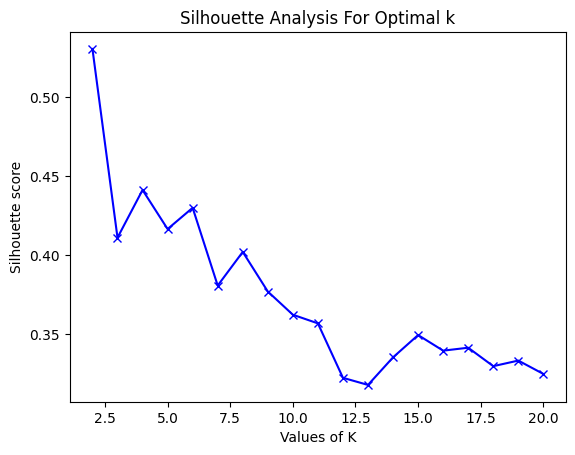

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = [] # list where avg silhoutte scores of each k means algorithm will go
for num_clusters in range(2, 21): # initialize with 2 as 1 gives an error 
 # initialize kmeans
 kmeans = KMeans(n_clusters=num_clusters, random_state=42)
 kmeans.fit(pca_data)
 cluster_labels = kmeans.labels_
 
 # calculating the average silhouette score
 silhouette_avg.append(silhouette_score(pca_data, cluster_labels))
 
# making a visualization that shows different scores 
plt.plot(range(2, 21),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis For Optimal k')
plt.show()

c:\Users\daran\miniconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\daran\miniconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\daran\miniconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\daran\miniconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\daran\miniconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be in

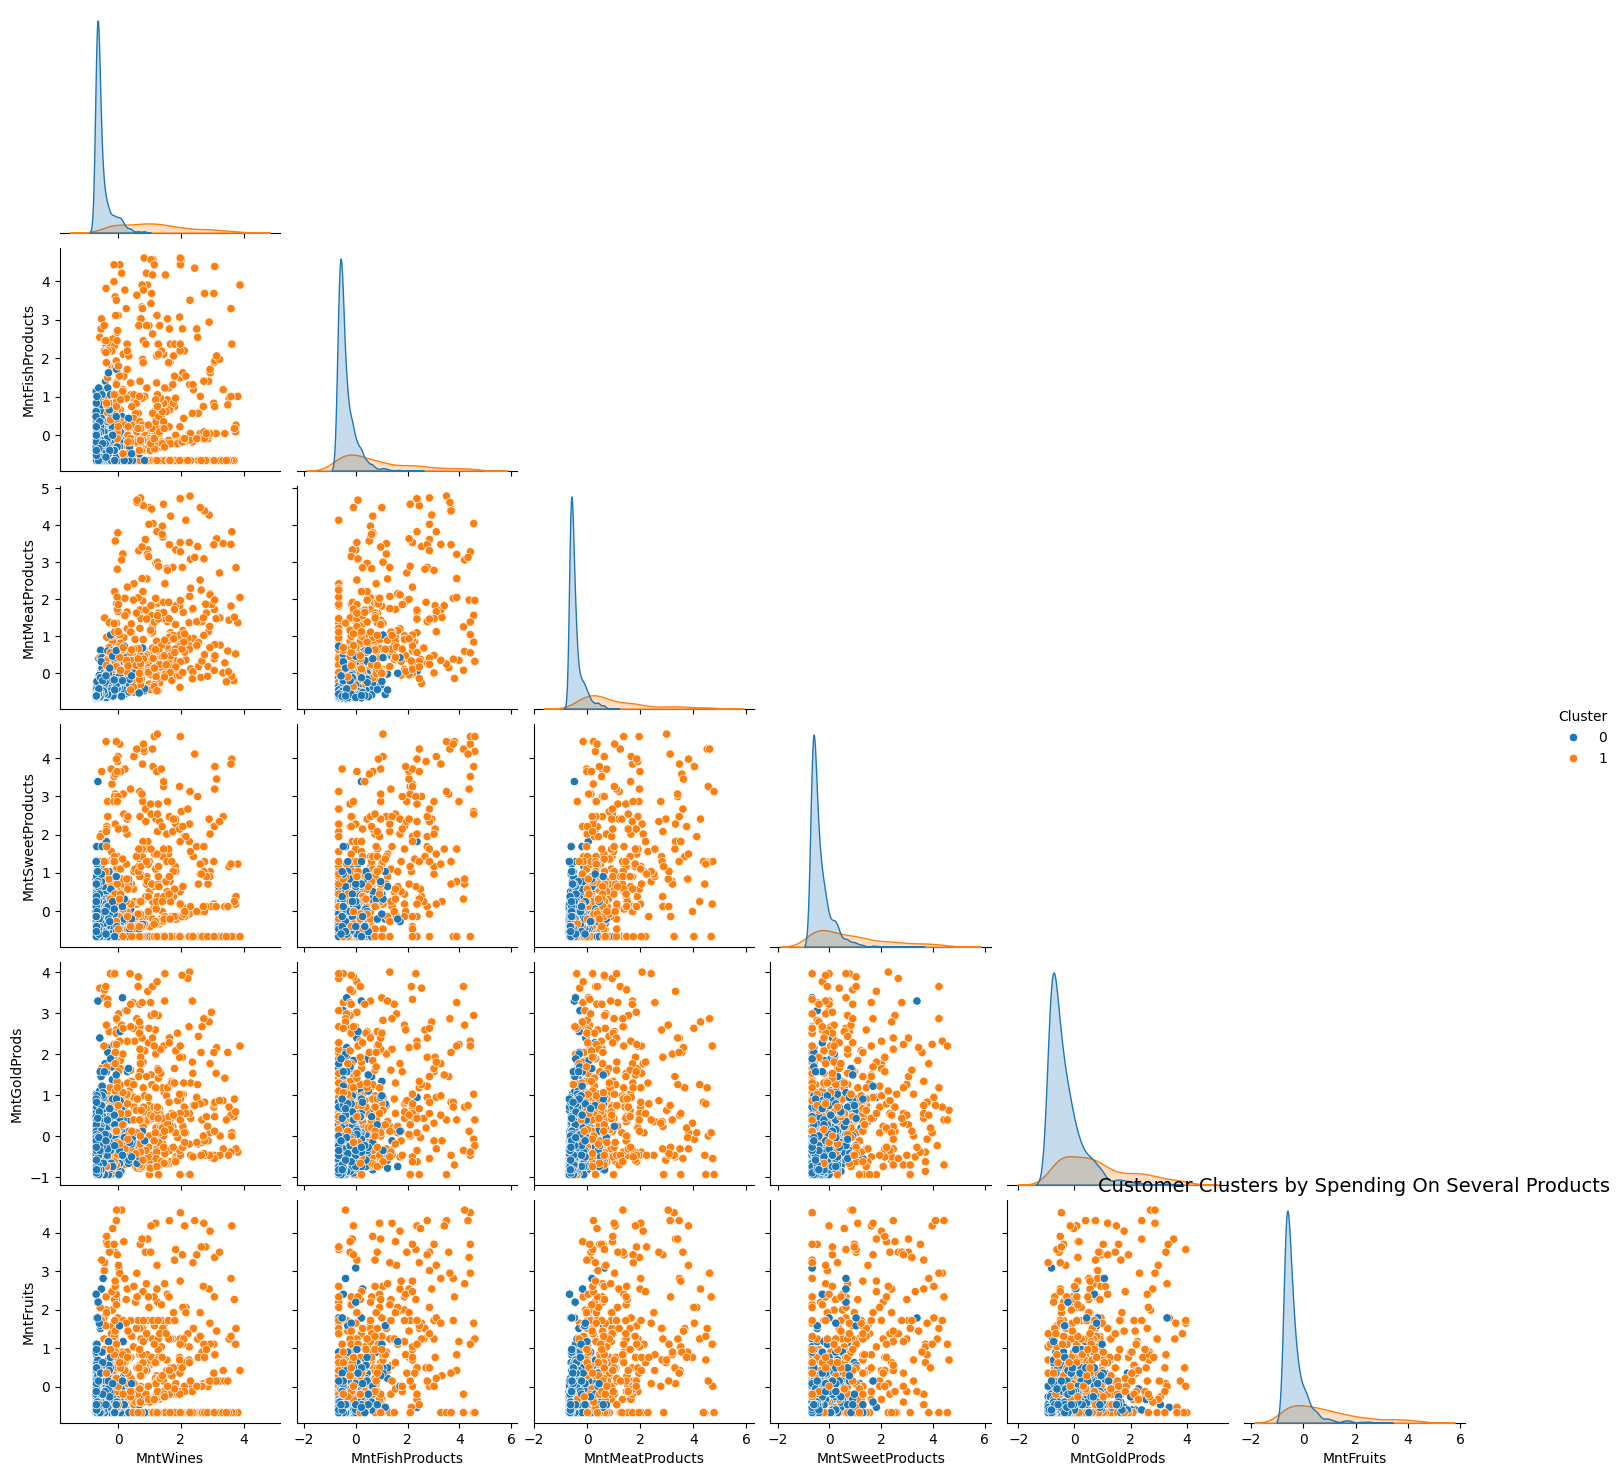

In [ ]:
# visualizing 10 clusters defined by K means algorithm
kmeans_10 = KMeans(n_clusters = 2, random_state =42, n_init="auto")
kmeans_10.fit(marketing_df_normalized)

# making a new dataset that adds clusters (K means labels) as one of the variables to be able to run visualization
marketing_df_with_clusters = marketing_df_normalized.copy()
marketing_df_with_clusters['Cluster'] = kmeans_10.labels_

# Create a color palette for 10 clusters
colors = sns.color_palette('tab10', n_colors=10)  # or 'tab10', 'Set3', etc.

# variables to plot
selected_vars = ['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', "MntFruits", "Cluster"]
# Create the pairplot
sns.pairplot(marketing_df_with_clusters[selected_vars],
             hue='Cluster',
             palette=colors,
             corner = True)

# adding title and labels to the graph
plt.title('Customer Clusters by Spending On Several Products', fontsize=14)

plt.show()

# Models

* Feature selection (like k-fold, etc.)
* Balancing and standardization
* Our three models

In [ ]:
# Balancing the data


# Results